# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

# Observation
+ There are some differences between the south and north hemisphere.
  + For the north, as the lattitude move up the temprature will go down as it is getting further to the equator, vice versa the south, the tempearature will move up when the lattitude move up, as they are getting close to equator.
  + No strong indicators for both south and north hemisphere in the lattitude vs humidity, and wind speed.
  + The wind speed spreads out from 0 to 20 mph from the south to north hemisphere.
  + As the latitude goes toward the south pole, or north pole, the cloudiness will increase as it is getting to coldest parts in the earth.

In [67]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

635

In [3]:
# Try to print out one city first, to see the json file, and the variables:
# City is Albany
test_url="http://api.openweathermap.org/data/2.5/weather?units=Imperial"
test_query_url=test_url+"&q="+'albany'+"&appid="+weather_api_key
test_weather=requests.get(test_query_url).json()
pprint(test_weather)

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 42.6, 'lon': -73.97},
 'dt': 1593530810,
 'id': 5106841,
 'main': {'feels_like': 71.29,
          'humidity': 69,
          'pressure': 1014,
          'temp': 70.11,
          'temp_max': 73.4,
          'temp_min': 66.99},
 'name': 'Albany',
 'sys': {'country': 'US',
         'id': 3273,
         'sunrise': 1593508898,
         'sunset': 1593563843,
         'type': 1},
 'timezone': -14400,
 'visibility': 16093,
 'weather': [{'description': 'broken clouds',
              'icon': '04d',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 0, 'speed': 3.36}}


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Create empty lists to store the data. And start the counter.
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
min_temp=[]
wind_speed = []
url="http://api.openweathermap.org/data/2.5/weather?units=Imperial"
count=1
print('------------------------')
print('Starting data retrieval')
print('------------------------')
for city in cities:
    try:
        query_url=url+"&q="+city+"&appid="+weather_api_key
        weather_response=requests.get(query_url).json()
        city_name.append(weather_response['name'])
        cloudiness.append(weather_response['clouds']['all'])
        country.append(weather_response['sys']['country'])
        date.append(weather_response['dt'])
        humidity.append(weather_response['main']['humidity'])
        lat.append(weather_response['coord']['lat'])
        lng.append(weather_response['coord']['lon'])
        max_temp.append(weather_response['main']['temp_max'])
        min_temp.append(weather_response['main']['temp_min'])
        wind_speed.append(weather_response['wind']['speed'])
        city_record = weather_response["name"]
        print(f"Processing Record {count} | {city_record}")
        count=count+1
        time.sleep(1.20)
    except:
        print('City not found. Skipping...')
    continue
print('------------------------')
print('Data Retrieval Completed')
print('------------------------')
        

------------------------
Starting data retrieval
------------------------
Processing Record 1 | Rikitea
Processing Record 2 | Esperance
Processing Record 3 | Port Alfred
Processing Record 4 | Rochegda
Processing Record 5 | Bonfim
Processing Record 6 | Bambous Virieux
City not found. Skipping...
Processing Record 7 | Norman Wells
Processing Record 8 | Barra de Tecoanapa
Processing Record 9 | Morón
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Processing Record 10 | Mataura
Processing Record 11 | Vaini
Processing Record 12 | Yellowknife
Processing Record 13 | George Town
Processing Record 14 | Port Hardy
Processing Record 15 | Manado
Processing Record 16 | Along
Processing Record 17 | Shakiso
Processing Record 18 | Jamestown
Processing Record 19 | Padang
Processing Record 20 | Fethiye
Processing Record 21 | Butaritari
Processing Record 22 | Havelock
Processing Record 23 | San Cristobal
Processing Record 24 | Bonthe
Processing Record 25 | Brae
Process

Processing Record 226 | Srednekolymsk
Processing Record 227 | Quepos
Processing Record 228 | Jalu
Processing Record 229 | Grand-Santi
Processing Record 230 | Faanui
Processing Record 231 | Agadez
Processing Record 232 | Qaanaaq
Processing Record 233 | Chemal
Processing Record 234 | Hernani
Processing Record 235 | Antofagasta
Processing Record 236 | Progreso
Processing Record 237 | The Valley
City not found. Skipping...
Processing Record 238 | Chazuta
Processing Record 239 | Salamanca
Processing Record 240 | Mae Hong Son
Processing Record 241 | Yumen
Processing Record 242 | Dunedin
Processing Record 243 | Grindavik
Processing Record 244 | Shenjiamen
Processing Record 245 | Gachsaran
Processing Record 246 | Pentecoste
Processing Record 247 | Avera
Processing Record 248 | Auki
Processing Record 249 | Peterhead
Processing Record 250 | Vestmannaeyjar
Processing Record 251 | Hervey Bay
Processing Record 252 | Champerico
Processing Record 253 | Yerbogachën
Processing Record 254 | Fort Morgan


Processing Record 456 | Vila Velha
Processing Record 457 | Kununurra
Processing Record 458 | Oddur
City not found. Skipping...
Processing Record 459 | Hamilton
Processing Record 460 | Tura
Processing Record 461 | Mezen'
Processing Record 462 | Paracuru
Processing Record 463 | Tākestān
Processing Record 464 | Umm Kaddadah
Processing Record 465 | Tazovsky
Processing Record 466 | Totness
Processing Record 467 | Belmonte
City not found. Skipping...
Processing Record 468 | Sergeevka
Processing Record 469 | Faya
Processing Record 470 | Alta Floresta
Processing Record 471 | Vestmanna
City not found. Skipping...
Processing Record 472 | Alice Town
Processing Record 473 | Oranjemund
Processing Record 474 | Esperanza
Processing Record 475 | Glamoč
Processing Record 476 | Alice Springs
Processing Record 477 | Reconquista
Processing Record 478 | Luancheng
Processing Record 479 | Malé
Processing Record 480 | Nabire
Processing Record 481 | Baruun-Urt
Processing Record 482 | Zabul Province
Processing 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Create a dictionary, then export to csv
weather_data={
     "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}
# Create a DataFrame to store the values
weather_data_df=pd.DataFrame(weather_data)
weather_data_df.count()

City          581
Cloudiness    581
Country       581
Date          581
Humidity      581
Lat           581
Lng           581
Max Temp      581
Wind Speed    581
dtype: int64

In [7]:
# Export to csv file
weather_data_df.to_csv('../output_data/weather_data_df.csv')
weather_data_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Rikitea,12,PF,1593530599,62,-23.12,-134.97,68.70,17.74
1,Esperance,75,AU,1593530947,76,-33.87,121.90,55.40,31.09
2,Port Alfred,25,ZA,1593530949,82,-33.59,26.89,60.01,7.99
3,Rochegda,100,RU,1593530950,42,62.80,43.25,64.17,9.86
4,Bonfim,99,BR,1593530951,80,3.08,-59.95,79.93,2.68


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [13]:
# Inspect the weather_data_df for cities with humidity >100%
# first method to use loc 
input_file=pd.read_csv('../output_data/weather_data_df.csv')
humi100=weather_data_df.loc[weather_data_df['Humidity']>=100]
# len(humi100)=20

In [16]:
#  Get the indices of cities that have humidity over 100%.
len(humi100)

18

In [17]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [18]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv

# So due to the condition, there are no cities with humidity is over 100%,but there are 18 of them with humidity = 100%

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

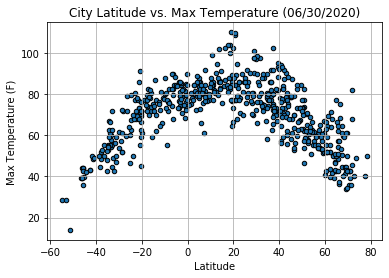

In [72]:
lat_vs_temp=weather_data_df.plot.scatter(x='Lat',y='Max Temp',marker='o',grid=True,title='City Latitude vs. Max Temperature (06/30/2020)',edgecolor='black')
lat_vs_temp.set_xlabel('Latitude')
lat_vs_temp.set_ylabel('Max Temperature (F)')
fig=lat_vs_temp.get_figure()
fig.savefig('../output_data/lat_vs_temp.png')

## Latitude vs. Humidity Plot

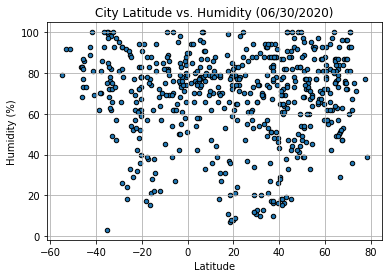

In [71]:
lat_vs_hum=weather_data_df.plot.scatter(x='Lat',y='Humidity',marker='o',grid=True,title='City Latitude vs. Humidity (06/30/2020)',edgecolor='black')
lat_vs_hum.set_xlabel('Latitude')
lat_vs_hum.set_ylabel('Humidity (%)')
fig=lat_vs_hum.get_figure()
fig.savefig('../output_data/lat_vs_hum.png')

## Latitude vs. Cloudiness Plot

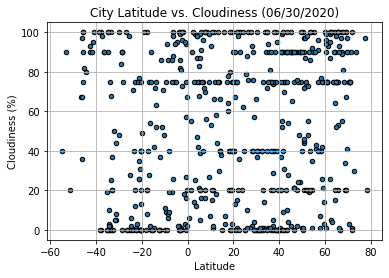

In [70]:
lat_vs_cloud=weather_data_df.plot.scatter(x='Lat',y='Cloudiness',marker='o',grid=True,title='City Latitude vs. Cloudiness (06/30/2020)',edgecolor='black')
lat_vs_cloud.set_xlabel('Latitude')
lat_vs_cloud.set_ylabel('Cloudiness (%)')
fig=lat_vs_cloud.get_figure()
fig.savefig('../output_data/lat_vs_cloud.png')

## Latitude vs. Wind Speed Plot

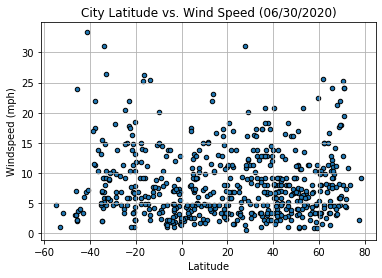

In [69]:
lat_vs_wind=weather_data_df.plot.scatter(x='Lat',y='Wind Speed',marker='o',grid=True,title='City Latitude vs. Wind Speed (06/30/2020)',edgecolor='black')
lat_vs_wind.set_xlabel('Latitude')
lat_vs_wind.set_ylabel('Windspeed (mph)')
fig=lat_vs_wind.get_figure()
fig.savefig('../output_data/lat_vs_wind.png')

## Linear Regression

In [33]:
# OPTIONAL: Create a function to create Linear Regression plots
# Create a for loop to calculate for the northern df
northern_df=weather_data_df.loc[weather_data_df['Lat']>=0]
y_north_columns=('Max Temp','Humidity','Cloudiness','Wind Speed')
north_slopes=[]
north_intercepts=[]
north_r_values=[]
north_regresses=[]
for n in y_north_columns:
    x_north_values=northern_df['Lat']
    y_north_values=northern_df[n]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_north_values, y_north_values)
    north_regress = x_north_values * slope + intercept
    north_r_squared=rvalue**2
    north_slopes.append(slope)
    north_intercepts.append(intercept)
    north_r_values.append(north_r_squared)
    north_regresses.append(north_regress)
# Create a for loop to calculate for the southern df
southern_df=weather_data_df.loc[weather_data_df['Lat']<0]
y_south_columns=('Max Temp','Humidity','Cloudiness','Wind Speed')
south_slopes=[]
south_intercepts=[]
south_r_values=[]
south_regresses=[]
for s in y_south_columns:
    x_south_values=southern_df['Lat']
    y_south_values=southern_df[s]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_south_values,y_south_values)
    south_regress = x_south_values * slope + intercept
    south_r_squared=rvalue**2
    south_slopes.append(slope)
    south_intercepts.append(intercept)
    south_r_values.append(south_r_squared)
    south_regresses.append(south_regress)


In [34]:
# Create Northern and Southern Hemisphere DataFrames
northern_df=weather_data_df.loc[weather_data_df['Lat']>=0]
southern_df=weather_data_df.loc[weather_data_df['Lat']<0]


In [47]:
north_hemisphere_df=pd.DataFrame()
north_hemisphere_df['Slopes']=north_slopes
north_hemisphere_df['Intercepts']=north_intercepts
north_hemisphere_df['R Squared']=north_r_values
south_hemisphere_df=pd.DataFrame()
south_hemisphere_df['Slopes']=south_slopes
south_hemisphere_df['Intercepts']=south_intercepts
south_hemisphere_df['R Squared']=south_r_values

In [45]:
north_hemisphere_df

,Slopes,Intercepts,R Squared
0,-0.559769,93.182863,0.542112
1,0.072172,64.972998,0.004371
2,0.211357,45.836464,0.013792
3,0.023170,7.185646,0.008033


In [48]:
south_hemisphere_df

,Slopes,Intercepts,R Squared
0,0.894802,85.393959,0.712163
1,-0.245423,65.150628,0.027129
2,-0.252525,39.562328,0.008078
3,-0.067174,6.807336,0.022713


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5421115218980165


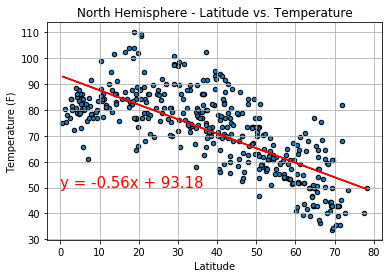

In [98]:
line_eq = "y = " + str(round(north_slopes[0],2)) + "x + " + str(round(north_intercepts[0],2))
north_lat_vs_temp=northern_df.plot.scatter(x='Lat',y='Max Temp',marker='o',grid=True,title='North Hemisphere - Latitude vs. Temperature',edgecolor='black')
north_lat_vs_temp.set_xlabel('Latitude')
north_lat_vs_temp.set_ylabel('Temperature (F)')
plt.plot(x_north_values,north_regresses[0],'red')
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
print(f'The r-squared is: {north_r_values[0]}')
fig=north_lat_vs_temp.get_figure()
fig.savefig('../output_data/north_regression_lat_vs_temp.png')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7121630492609388


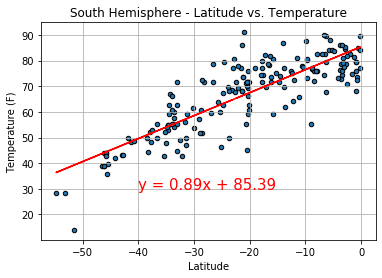

In [99]:
line_eq = "y = " + str(round(south_slopes[0],2)) + "x + " + str(round(south_intercepts[0],2))
south_lat_vs_temp=southern_df.plot.scatter(x='Lat',y='Max Temp',marker='o',grid=True,title='South Hemisphere - Latitude vs. Temperature',edgecolor='black')
south_lat_vs_temp.set_xlabel('Latitude')
south_lat_vs_temp.set_ylabel('Temperature (F)')
plt.plot(x_south_values,south_regresses[0],'red')
plt.annotate(line_eq,(-40,30),fontsize=15,color="red")
print(f'The r-squared is: {south_r_values[0]}')
fig=south_lat_vs_temp.get_figure()
fig.savefig('../output_data/south_regression_lat_vs_temp.png')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.004370768257125004


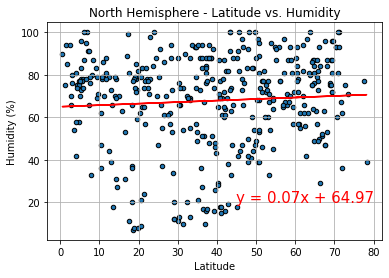

In [100]:
line_eq = "y = " + str(round(north_slopes[1],2)) + "x + " + str(round(north_intercepts[1],2))
north_lat_vs_hum=northern_df.plot.scatter(x='Lat',y='Humidity',marker='o',grid=True,title='North Hemisphere - Latitude vs. Humidity',edgecolor='black')
north_lat_vs_hum.set_xlabel('Latitude')
north_lat_vs_hum.set_ylabel('Humidity (%)')
plt.plot(x_north_values,north_regresses[1],'red')
plt.annotate(line_eq,(45,20),fontsize=15,color="red")
print(f'The r-squared is: {north_r_values[1]}')
fig=north_lat_vs_hum.get_figure()
fig.savefig('../output_data/north_regression_lat_vs_hum.png')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.027128624989720636


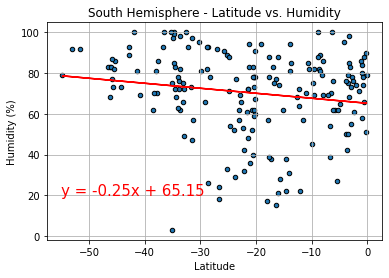

In [101]:
line_eq = "y = " + str(round(south_slopes[1],2)) + "x + " + str(round(south_intercepts[1],2))
south_lat_vs_hum=southern_df.plot.scatter(x='Lat',y='Humidity',marker='o',grid=True,title='South Hemisphere - Latitude vs. Humidity',edgecolor='black')
south_lat_vs_hum.set_xlabel('Latitude')
south_lat_vs_hum.set_ylabel('Humidity (%)')
plt.plot(x_south_values,south_regresses[1],'red')
plt.annotate(line_eq,(-55,20),fontsize=15,color="red")
print(f'The r-squared is: {south_r_values[1]}')
fig=south_lat_vs_hum.get_figure()
fig.savefig('../output_data/south_regression_lat_vs_hum.png')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.01379170566974703


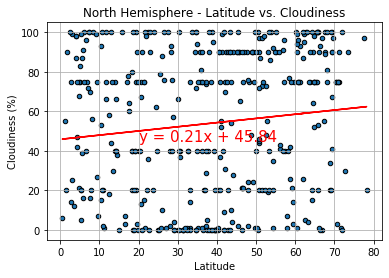

In [102]:
line_eq = "y = " + str(round(north_slopes[2],2)) + "x + " + str(round(north_intercepts[2],2))
north_lat_vs_cloud=northern_df.plot.scatter(x='Lat',y='Cloudiness',marker='o',grid=True,title='North Hemisphere - Latitude vs. Cloudiness',edgecolor='black')
north_lat_vs_cloud.set_xlabel('Latitude')
north_lat_vs_cloud.set_ylabel('Cloudiness (%)')
plt.plot(x_north_values,north_regresses[2],'red')
plt.annotate(line_eq,(20,45),fontsize=15,color="red")
print(f'The r-squared is: {north_r_values[2]}')
fig=north_lat_vs_cloud.get_figure()
fig.savefig('../output_data/north_regression_lat_vs_cloud.png')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.008077665789621307


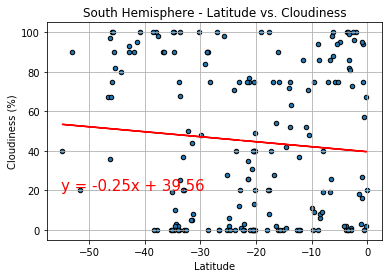

In [103]:
line_eq = "y = " + str(round(south_slopes[2],2)) + "x + " + str(round(south_intercepts[2],2))
south_lat_vs_cloud=southern_df.plot.scatter(x='Lat',y='Cloudiness',marker='o',grid=True,title='South Hemisphere - Latitude vs. Cloudiness',edgecolor='black')
south_lat_vs_cloud.set_xlabel('Latitude')
south_lat_vs_cloud.set_ylabel('Cloudiness (%)')
plt.plot(x_south_values,south_regresses[2],'red')
plt.annotate(line_eq,(-55,20),fontsize=15,color="red")
print(f'The r-squared is: {south_r_values[2]}')
fig=south_lat_vs_cloud.get_figure()
fig.savefig('../output_data/south_regression_lat_vs_cloud.png')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.008032661560807045


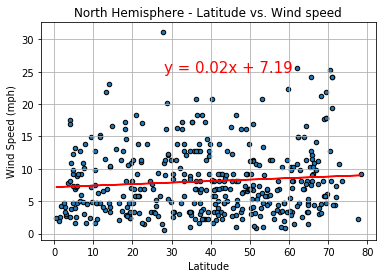

In [104]:
line_eq = "y = " + str(round(north_slopes[3],2)) + "x + " + str(round(north_intercepts[3],2))
north_lat_vs_wind=northern_df.plot.scatter(x='Lat',y='Wind Speed',marker='o',grid=True,title='North Hemisphere - Latitude vs. Wind speed',edgecolor='black')
north_lat_vs_wind.set_xlabel('Latitude')
north_lat_vs_wind.set_ylabel('Wind Speed (mph)')
plt.plot(x_north_values,north_regresses[3],'red')
plt.annotate(line_eq,(28,25),fontsize=15,color="red")
print(f'The r-squared is: {north_r_values[3]}')
fig=north_lat_vs_wind.get_figure()
fig.savefig('../output_data/north_regression_lat_vs_wind.png')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.022713308075883537


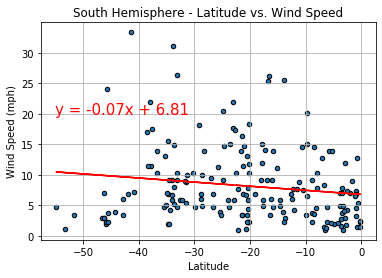

In [105]:
line_eq = "y = " + str(round(south_slopes[3],2)) + "x + " + str(round(south_intercepts[3],2))
south_lat_vs_wind=southern_df.plot.scatter(x='Lat',y='Wind Speed',marker='o',grid=True,title='South Hemisphere - Latitude vs. Wind Speed',edgecolor='black')
south_lat_vs_wind.set_xlabel('Latitude')
south_lat_vs_wind.set_ylabel('Wind Speed (mph)')
plt.plot(x_south_values,south_regresses[3],'red')
plt.annotate(line_eq,(-55,20),fontsize=15,color="red")
print(f'The r-squared is: {south_r_values[3]}')
fig=south_lat_vs_wind.get_figure()
fig.savefig('../output_data/south_regression_lat_vs_wind.png')